# **Library Imports**

In [204]:
import pandas as pd
import numpy as np

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy as load

In [206]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim

# **GPU Things**

In [207]:
dtype = torch.cuda.FloatTensor
device = torch.device('cuda')

# **Loading dataset**

In [208]:
X_test = load.convert_from_file(r".\MNIST\raw\t10k-images-idx3-ubyte")
y_test = load.convert_from_file(r".\MNIST\raw\t10k-labels-idx1-ubyte")
X_train = load.convert_from_file(r".\MNIST\raw\train-images-idx3-ubyte")
y_train = load.convert_from_file(r".\MNIST\raw\train-labels-idx1-ubyte")

In [209]:
X_train.shape

(60000, 28, 28)

In [210]:
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

In [330]:
df = pd.Series(y_train)
df.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

# **Reviewing some samples**

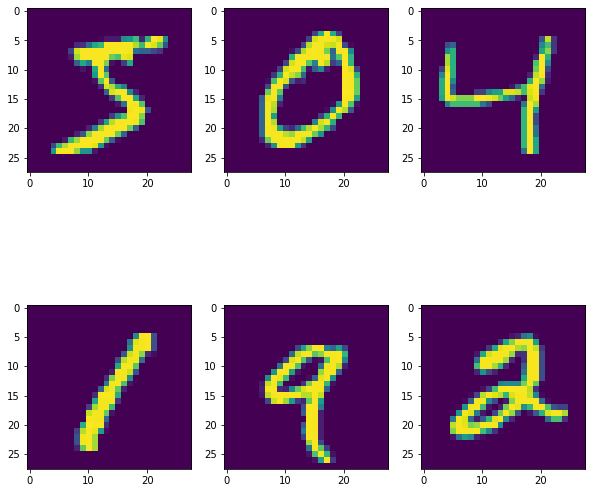

In [211]:
count = 0
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,10))
for pic, label in zip(X_train, y_train):
    ax[count // 3, count % 3].imshow(pic.view(28,28))
    count += 1
    if count == 6:
        break

# **Creating the NN graph**

In [335]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return f.log_softmax(x, dim = 1)
              
net = Net()
print(net)        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [336]:
optimiser = optim.Adam(net.parameters(), lr = 1e-3)
loss_rec = []

# **Training**

In [337]:
for i in range(y_train.shape[0] // 10):
    seed = np.random.randint(0, y_train.shape[0], 50)
    y = y_train[seed]
    x = X_train[seed, :, :]
    net.zero_grad()
    pred = net.forward(x.view(-1, 28 * 28).float())
    loss = f.nll_loss(pred, y.long())
    
    if(i % 10000 == 0):
        print(loss)
    
    loss_rec.append(loss)
    loss.backward()
    optimiser.step()

tensor(4.4785, grad_fn=<NllLossBackward>)


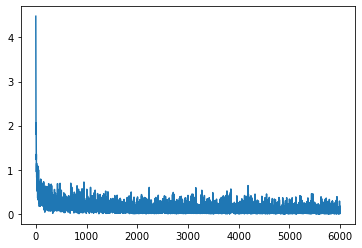

In [338]:
plt.plot(loss_rec)

In [339]:
import pickle
save = pickle.dumps(net)

In [340]:
net = pickle.loads(save)

tensor(5)
tensor(0)
tensor(4)
tensor(1)
tensor(9)
tensor(2)


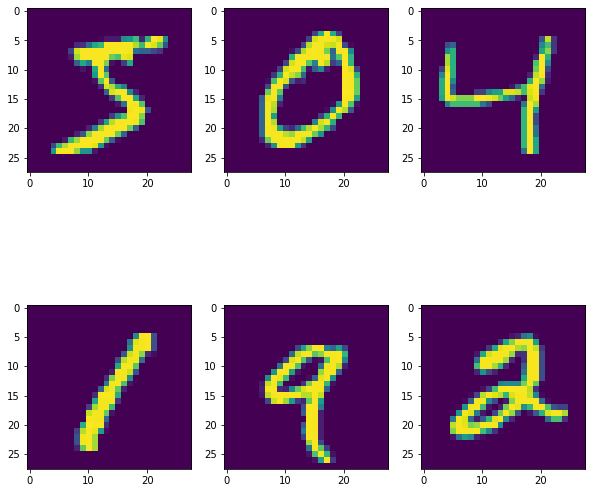

In [356]:
count = 0
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,10))
for pic, label in zip(X_train, y_train):
    ax[count // 3, count % 3].imshow(pic.view(28,28))
    with torch.no_grad():
        pred = net.forward(pic.view(-1, 28 * 28).float())
        print(torch.argmax(pred))
    count += 1
    if count == 6:
        break

# **Testing**

In [388]:
correct = 0

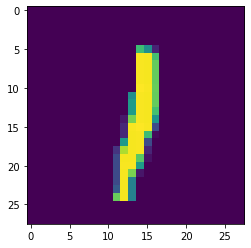

tensor(1)


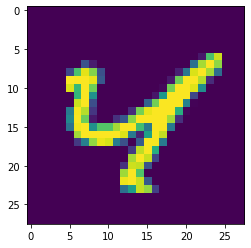

tensor(4)


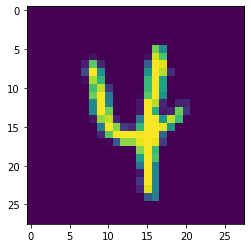

tensor(4)


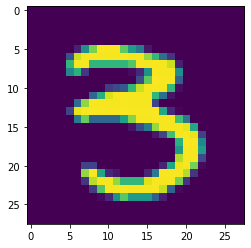

tensor(3)


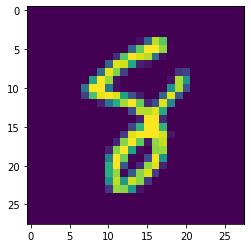

tensor(8)


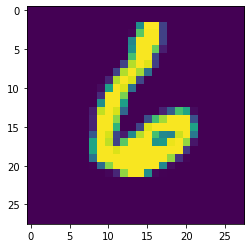

tensor(6)


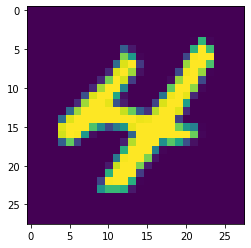

tensor(4)


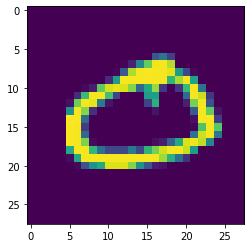

tensor(0)


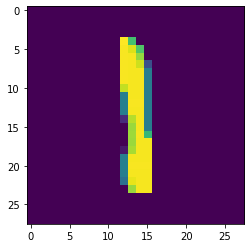

tensor(1)
Accuracy : 0.9701


In [389]:
with torch.no_grad():    
    for x,y in zip(X_test, y_test):
        pred = net.forward(x.view(-1, 28 * 28).float())
        if torch.argmax(pred) == y:
            correct +=1 
        if correct % 1000 == 0:
            plt.imshow(x.view(28,28))
            plt.show()
            print(torch.argmax(pred))
        
print("Accuracy :", correct / y_test.shape[0])

# **A Custom Drawing**

In [358]:
check = plt.imread(r"C:\Users\sanji\OneDrive\Desktop\3.png")

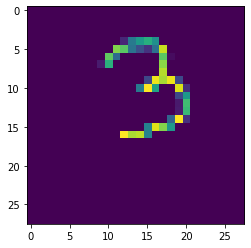

In [359]:
check = check[:,:,0]
plt.imshow(check)

In [360]:
check = torch.tensor(check) 

In [363]:
with torch.no_grad():
    pred = net.forward(check.view(-1, 28 * 28).float())
    print(torch.argmax(pred))

tensor(8)


In [369]:
check = plt.imread(r"C:\Users\sanji\OneDrive\Desktop\6'.png")

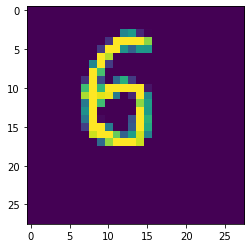

In [370]:
check = check[:,:,0]
plt.imshow(check)

In [371]:
check = torch.tensor(check) 

In [372]:
with torch.no_grad():
    pred = net.forward(check.view(-1, 28 * 28).float())
    print(torch.argmax(pred))

tensor(8)


In [384]:
check = plt.imread(r"C:\Users\sanji\OneDrive\Desktop\5.png")

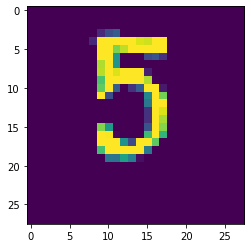

In [385]:
check = check[:,:,0]
plt.imshow(check)

In [386]:
check = torch.tensor(check) 

In [387]:
with torch.no_grad():
    pred = net.forward(check.view(-1, 28 * 28).float())
    print(torch.argmax(pred))

tensor(8)


# **Poor Generalisation**
Need to use a ConvNet for better results